In [1]:
pwd

'C:\\Users\\mspurrie'

In [6]:
%cd "C:\Users\mspurrie\Desktop\Python Scripts\"

C:\Users\mspurrie\Desktop\Python Scripts


In [7]:
# Boston Housing Study (Python)
# using data from the Boston Housing Study case
# as described in "Marketing Data Science: Modeling Techniques
# for Predictive Analytics with R and Python" (Miller 2015)

# Here we use data from the Boston Housing Study to evaluate
# regression modeling methods within a cross-validation design.

# program revised by Thomas W. Milller (2017/09/29)

# Scikit Learn documentation for this assignment:
# http://scikit-learn.org/stable/modules/model_evaluation.html 
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.model_selection.KFold.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.LinearRegression.html
# http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Ridge.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.Lasso.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.linear_model.ElasticNet.html
# http://scikit-learn.org/stable/modules/generated/
#   sklearn.metrics.r2_score.html

# Textbook reference materials:
# Geron, A. 2017. Hands-On Machine Learning with Scikit-Learn
# and TensorFlow. Sebastopal, Calif.: O'Reilly. Chapter 3 Training Models
# has sections covering linear regression, polynomial regression,
# and regularized linear models. Sample code from the book is 
# available on GitHub at https://github.com/ageron/handson-ml

# prepare for Python version 3x features and functions
# comment out for Python 3.x execution
# from __future__ import division, print_function
# from future_builtins import ascii, filter, hex, map, oct, zip


In [8]:
# seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

In [9]:
# although we standardize X and y variables on input,
# we will fit the intercept term in the models
# Expect fitted values to be close to zero
SET_FIT_INTERCEPT = True


In [10]:
# import base packages into the namespace for this program
import numpy as np
import pandas as pd

# modeling routines from Scikit Learn packages
import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score  
from math import sqrt  # for root mean-squared error calculation


In [11]:
# read data for the Boston Housing Study
# creating data frame restdata
boston_input = pd.read_csv('boston.csv')


In [13]:
# check the pandas DataFrame object boston_input
print('\nboston DataFrame (first and last five rows):')
print(boston_input.head())
print(boston_input.tail())



boston DataFrame (first and last five rows):
  neighborhood     crim    zn  indus  chas    nox  rooms   age     dis  rad  \
0       Nahant  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1   
1   Swampscott  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2   
2   Swanpscott  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2   
3   Marblehead  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3   
4   Marblehead  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3   

   tax  ptratio  lstat    mv  
0  296     15.3   4.98  24.0  
1  242     17.8   9.14  21.6  
2  242     17.8   4.03  34.7  
3  222     18.7   2.94  33.4  
4  222     18.7   5.33  36.2  
    neighborhood     crim   zn  indus  chas    nox  rooms   age     dis  rad  \
501     Winthrop  0.06263  0.0  11.93     0  0.573  6.593  69.1  2.4786    1   
502     Winthrop  0.04527  0.0  11.93     0  0.573  6.120  76.7  2.2875    1   
503     Winthrop  0.06076  0.0  11.93     0  0.573  6

In [14]:
print('\nGeneral description of the boston_input DataFrame:')
print(boston_input.info())


General description of the boston_input DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
neighborhood    506 non-null object
crim            506 non-null float64
zn              506 non-null float64
indus           506 non-null float64
chas            506 non-null int64
nox             506 non-null float64
rooms           506 non-null float64
age             506 non-null float64
dis             506 non-null float64
rad             506 non-null int64
tax             506 non-null int64
ptratio         506 non-null float64
lstat           506 non-null float64
mv              506 non-null float64
dtypes: float64(10), int64(3), object(1)
memory usage: 55.5+ KB
None


In [15]:
# drop neighborhood from the data being considered
boston = boston_input.drop('neighborhood', 1)
print('\nGeneral description of the boston DataFrame:')
print(boston.info())



General description of the boston DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
crim       506 non-null float64
zn         506 non-null float64
indus      506 non-null float64
chas       506 non-null int64
nox        506 non-null float64
rooms      506 non-null float64
age        506 non-null float64
dis        506 non-null float64
rad        506 non-null int64
tax        506 non-null int64
ptratio    506 non-null float64
lstat      506 non-null float64
mv         506 non-null float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB
None


In [17]:
print('\nDescriptive statistics of the boston DataFrame:')
boston.describe()



Descriptive statistics of the boston DataFrame:


,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [18]:
# set up preliminary data for data for fitting the models 
# the first column is the median housing value response
# the remaining columns are the explanatory variables
prelim_model_data = np.array([boston.mv,\
    boston.crim,\
    boston.zn,\
    boston.indus,\
    boston.chas,\
    boston.nox,\
    boston.rooms,\
    boston.age,\
    boston.dis,\
    boston.rad,\
    boston.tax,\
    boston.ptratio,\
    boston.lstat]).T

In [19]:
# dimensions of the polynomial model X input and y response
# preliminary data before standardization
print('\nData dimensions:', prelim_model_data.shape)



Data dimensions: (506, 13)


In [20]:
# standard scores for the columns... along axis 0
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(prelim_model_data))

StandardScaler(copy=True, with_mean=True, with_std=True)


In [21]:
# show standardization constants being employed
print(scaler.mean_)
print(scaler.scale_)


[2.25288538e+01 3.61352356e+00 1.13636364e+01 1.11367787e+01
 6.91699605e-02 5.54695059e-01 6.28463439e+00 6.85749012e+01
 3.79504269e+00 9.54940711e+00 4.08237154e+02 1.84555336e+01
 1.26530632e+01]
[9.17309810e+00 8.59304135e+00 2.32993957e+01 6.85357058e+00
 2.53742935e-01 1.15763115e-01 7.01922514e-01 2.81210326e+01
 2.10362836e+00 8.69865112e+00 1.68370495e+02 2.16280519e+00
 7.13400164e+00]


In [22]:
# the model data will be standardized form of preliminary model data
model_data = scaler.fit_transform(prelim_model_data)


In [23]:
# dimensions of the polynomial model X input and y response
# all in standardized units of measure
print('\nDimensions for model_data:', model_data.shape)


Dimensions for model_data: (506, 13)


## EDA

In [25]:
#Imports for visualizations
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [26]:
boston.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [27]:
boston.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


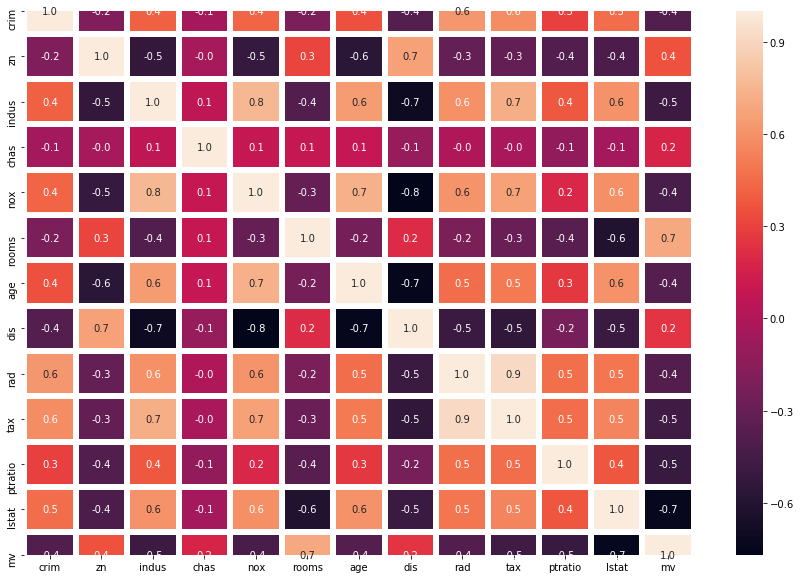

In [36]:
#General overview of correclation among the features using a heatmap
f,ax=plt.subplots(figsize=(15,10))
sns.heatmap(boston.corr(),linewidths=5,fmt='.1f',ax=ax, annot = True)
plt.show()

The negative correlations show that as those values decrease, median value increases, especially high with the lstat variable. Positive values mean as those variables increase so does mean value, rooms is a good example of this.

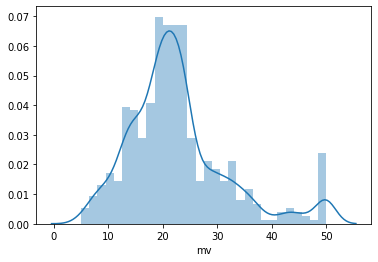

In [32]:
#distribution of median house prices
sns.distplot(boston['mv'], bins=30)

In [40]:
#looking at outlier values
boston['mv'].max()

50.0

In [43]:
#outlier values again
boston[boston['mv'] > 45].count()

crim       22
zn         22
indus      22
chas       22
nox        22
rooms      22
age        22
dis        22
rad        22
tax        22
ptratio    22
lstat      22
mv         22
dtype: int64

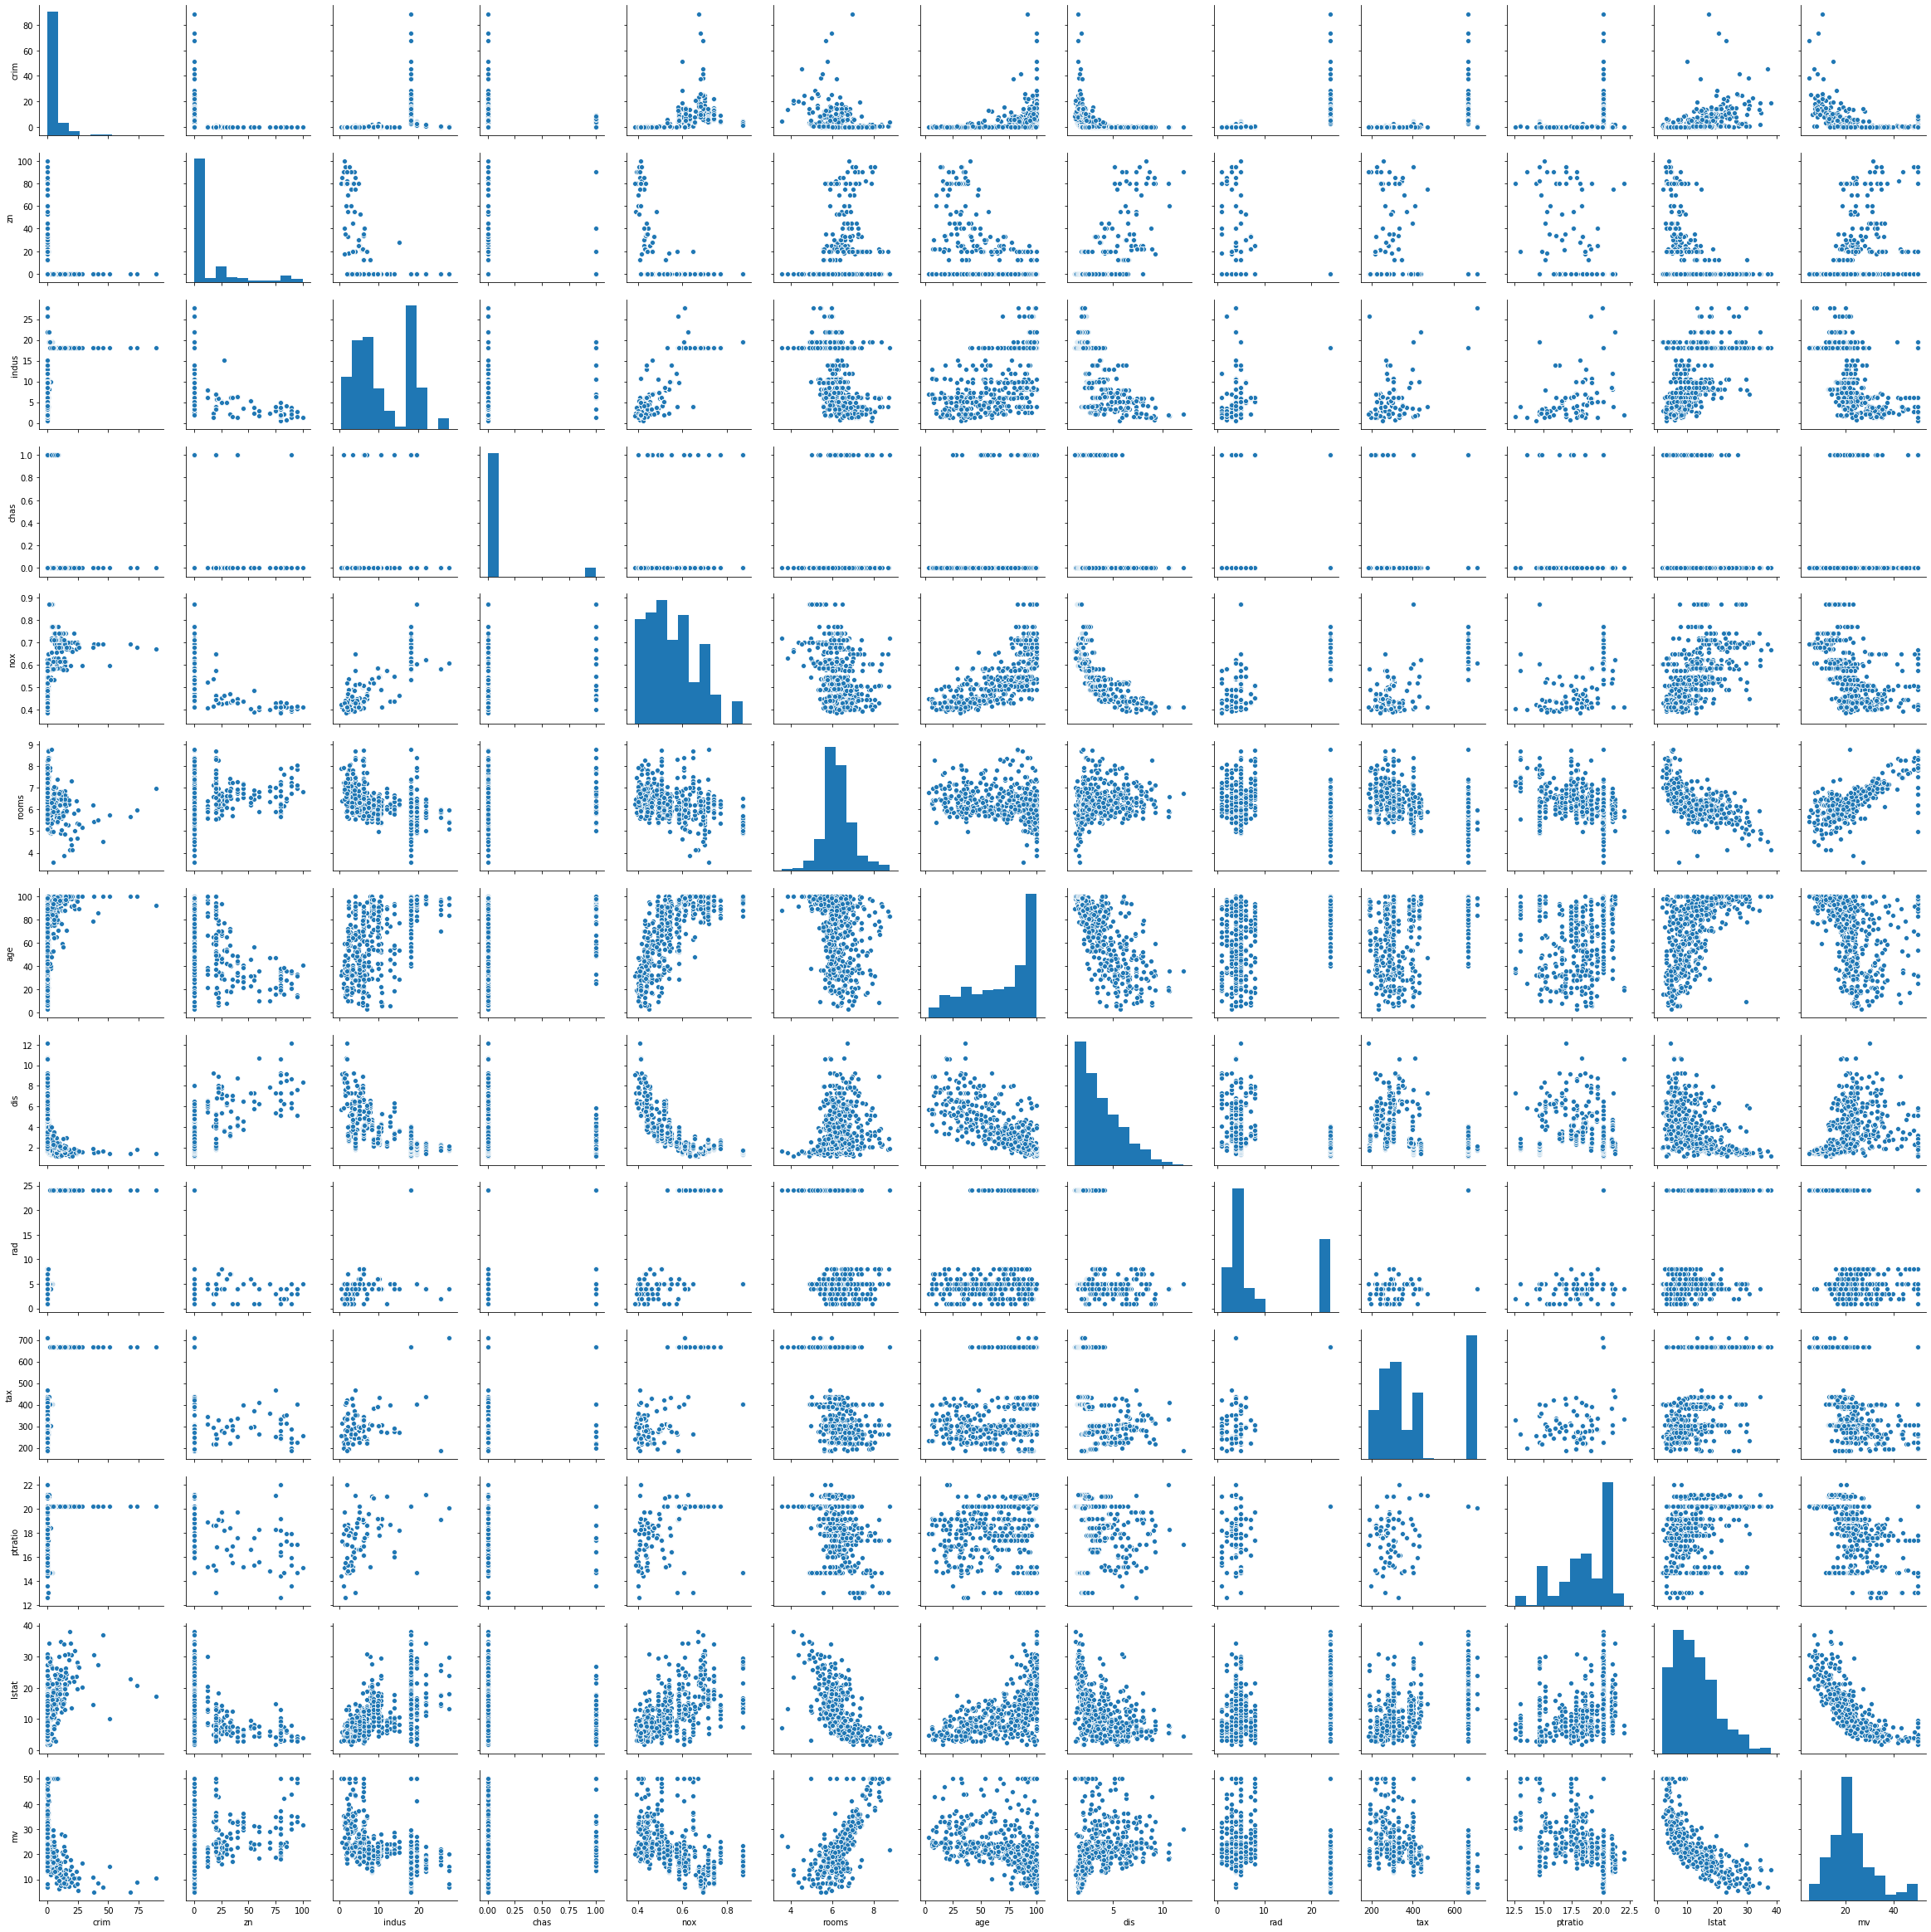

In [44]:
#pairplot to look at further correlation
sns.pairplot(data=boston)

### Various plots to examine relationships more deeply

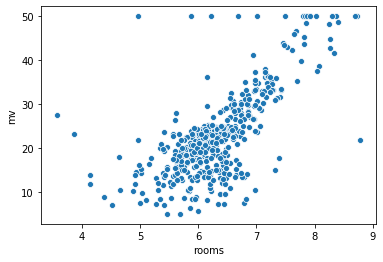

In [45]:
#checking high correlation of rooms with median value
sns.scatterplot('rooms','mv', data = boston)

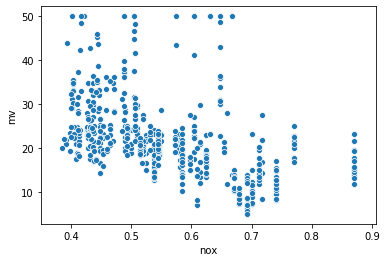

In [46]:
sns.scatterplot('nox', 'mv', data = boston)

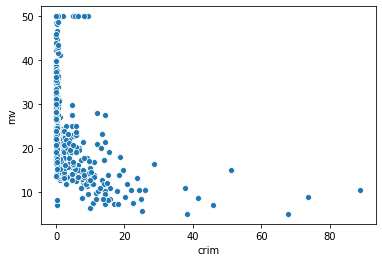

In [48]:
sns.scatterplot('crim', 'mv', data = boston)

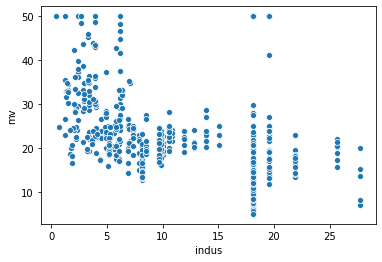

In [49]:
sns.scatterplot('indus', 'mv', data = boston)

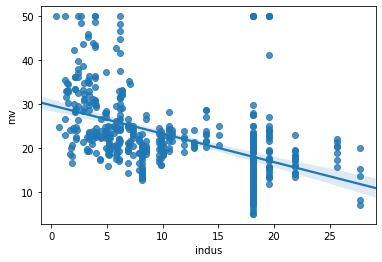

In [50]:
sns.regplot('indus', 'mv', data = boston)

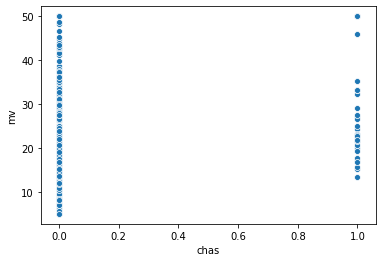

In [51]:
sns.scatterplot('chas', 'mv', data = boston)

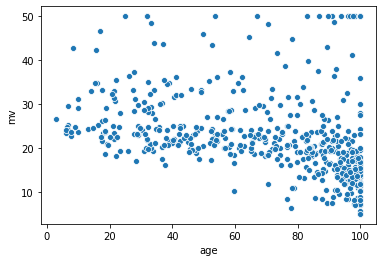

In [52]:
sns.scatterplot('age', 'mv', data = boston)

In [53]:
#the trend goes that the older the house the lower the value, however, some of the highest median values are for the oldest houses
#this will be tricky for the model since this variable could mean cheap or expensive

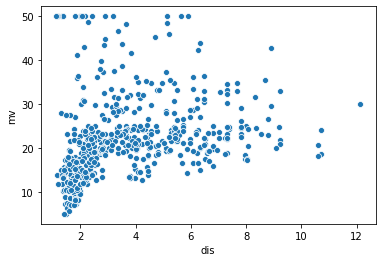

In [54]:
sns.scatterplot('dis', 'mv', data = boston)
#similar to age, the lowest and highest values are at the same point

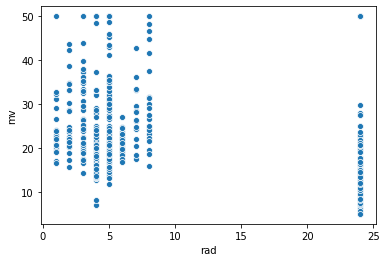

In [55]:
sns.scatterplot('rad', 'mv', data = boston)

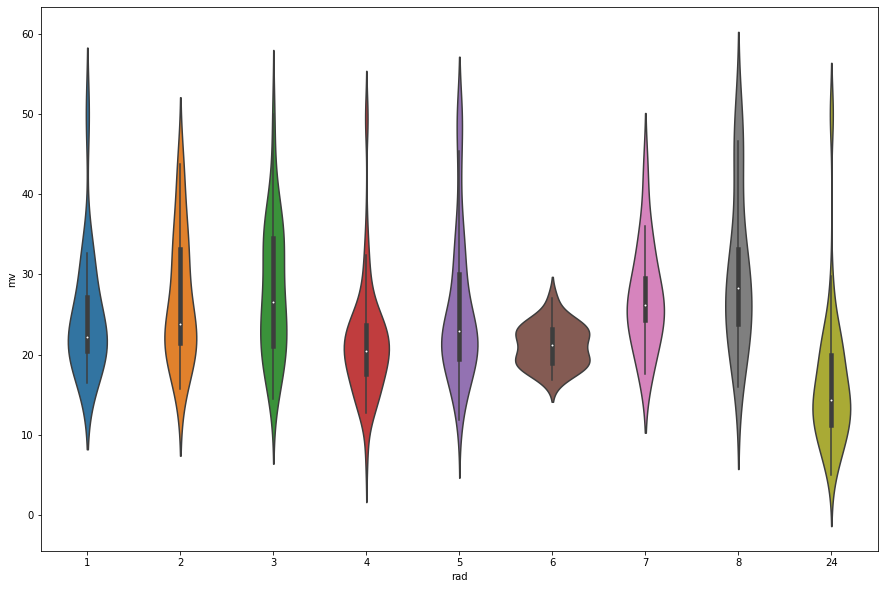

In [58]:
f,ax=plt.subplots(figsize=(15,10))
sns.violinplot('rad','mv', data = boston, split = True)

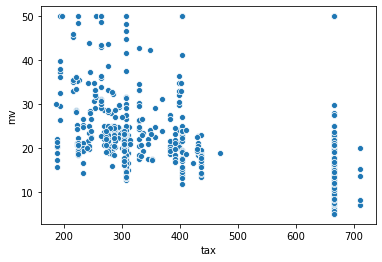

In [59]:
sns.scatterplot('tax', 'mv', data = boston)
#higher the tax rate, lower the mean value, still with some outliers

In [60]:
boston['tax'].describe()

count    506.000000
mean     408.237154
std      168.537116
min      187.000000
25%      279.000000
50%      330.000000
75%      666.000000
max      711.000000
Name: tax, dtype: float64

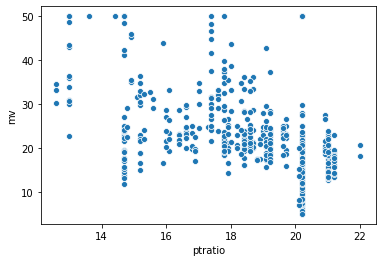

In [61]:
sns.scatterplot('ptratio', 'mv', data = boston)

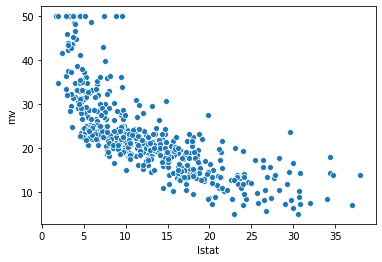

In [62]:
sns.scatterplot('lstat', 'mv', data = boston)
#very obvious that the lower the socio-economic class, the lower the median value

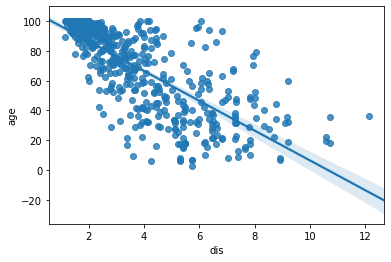

In [68]:
#looking at multicollinearity between 'dis' and 'age'
sns.regplot('dis', 'age', data = boston)

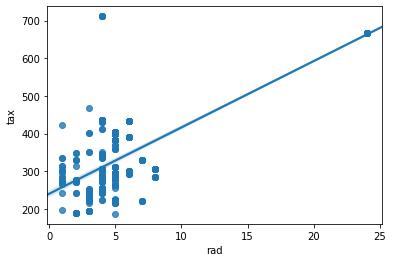

In [67]:
#looking at multicollinearity between 'rad' and 'tax'
sns.regplot('rad','tax',data = boston)

In [75]:
#this multicolllinearity may be caused by an outlier
boston['rad'].max()

24

In [77]:
boston[boston['rad'] == 24]
#not an outlier since there are 132 values at rad == 24

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
356,8.98296,0.0,18.1,1,0.770,6.212,97.4,2.1222,24,666,20.2,17.60,17.8
357,3.84970,0.0,18.1,1,0.770,6.395,91.0,2.5052,24,666,20.2,13.27,21.7
358,5.20177,0.0,18.1,1,0.770,6.127,83.4,2.7227,24,666,20.2,11.48,22.7
359,4.26131,0.0,18.1,0,0.770,6.112,81.3,2.5091,24,666,20.2,12.67,22.6
360,4.54192,0.0,18.1,0,0.770,6.398,88.0,2.5182,24,666,20.2,7.79,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2.81838,0.0,18.1,0,0.532,5.762,40.3,4.0983,24,666,20.2,10.42,21.8
484,2.37857,0.0,18.1,0,0.583,5.871,41.9,3.7240,24,666,20.2,13.34,20.6
485,3.67367,0.0,18.1,0,0.583,6.312,51.9,3.9917,24,666,20.2,10.58,21.2
486,5.69175,0.0,18.1,0,0.583,6.114,79.8,3.5459,24,666,20.2,14.98,19.1


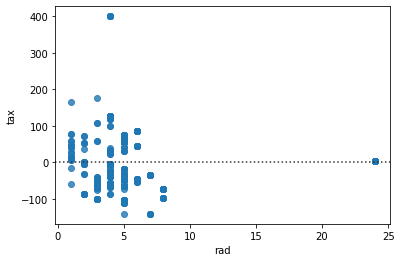

In [81]:
#Analysis of Variance for Linear Regression
sns.residplot('rad', 'tax', data = boston)

Though there is multicollinearity among some of the variables, since the assignment requires that we use all variables, I won't drop them. This will not affect the prediction ability of the model. Instead it makes it challenging to understand the specific effect of the collinear varialbes on the response variable, median value.

## Regression Analysis

In [165]:
#Imports for performing linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [166]:
#splitting data for regression
X = boston.iloc[:,1:-1] #independant variables
y = boston.iloc[:,-1] #response variable mv

In [167]:
#Split data to test and train data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [168]:
# Create regressor object
reg = LinearRegression() 
 
# Fitting data
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [169]:
# Predict
y_pred = reg.predict(X_test)

In [170]:
#evaluating the model using RMSE
from sklearn.metrics import mean_absolute_error

rmse = sqrt(mean_absolute_error(y_pred, y_test))
print('RMSE = ', rmse)

RMSE =  1.8109473105472162


Text(0, 0.5, 'Real')

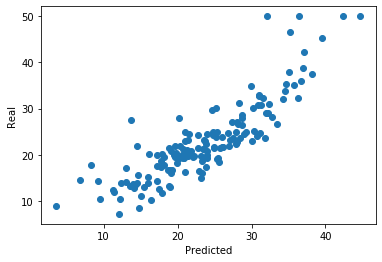

In [171]:
plt.scatter(y_pred, y_test)
plt.xlabel('Predicted')
plt.ylabel('Real')

In [172]:
#Create dataframe from real values and predicted values to see how model worked
linear_reg_df = pd.DataFrame(y_test)
linear_reg_df['predicted_value'] = y_pred
linear_reg_df

,mv,predicted_value
17,17.5,17.217269
248,24.5,21.504068
41,26.6,28.200432
491,13.6,14.028433
407,27.9,20.215996
...,...,...
319,21.0,21.334896
273,35.2,35.707032
88,23.6,31.839381
330,19.8,22.233115


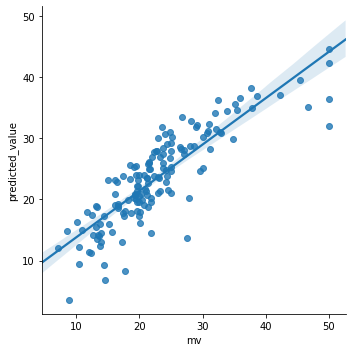

In [173]:
# Plot regression model
sns.lmplot(x='mv', y='predicted_value', data=linear_reg_df)

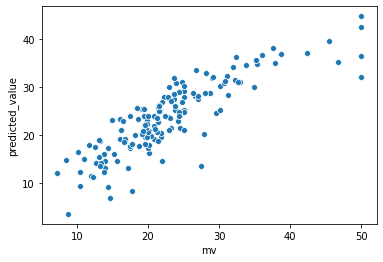

In [174]:
# Scatterplot of predicted values and mv
sns.scatterplot(x='mv', y='predicted_value', data=linear_reg_df)

In [175]:
#Accuracy Score
print("Score ", reg.score(X_test, y_test))

Score  0.7327954316582425


## Elastic Net
Using Elastic Net as according to Geron, this is usefull when some features are highly correlated. In this data: dis, age and rad, tax are highly correlated.

In [176]:
b_elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
b_elastic_net.fit(X_train, y_train)
e_pred = b_elastic_net.predict(X_test)

In [177]:
rmse2 = sqrt(mean_absolute_error(e_pred, y_test))
print('RMSE = ', rmse)

RMSE =  1.8109473105472162


In [178]:
#Accuracy Score
print("Score ", b_elastic_net.score(X_test, y_test))

Score  0.7352842746694971


## Lasso

In [155]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)
lasso_pred = lasso_reg.predict(X_test)

In [156]:
rmse3 = sqrt(mean_absolute_error(lasso_pred, y_test))
print('RMSE = ', rmse)

RMSE =  1.9104875772401202


In [157]:
#Accuracy Score
print("Score ", lasso_reg.score(X_test, y_test))

Score  0.6389202964815899


## Ridge Regression

In [162]:
ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X_train, y_train)
r_pred = ridge_reg.predict(X_test)

In [163]:
rmse4 = sqrt(mean_absolute_error(r_pred, y_test))
print('RMSE = ', rmse)

RMSE =  1.9104875772401202


In [164]:
#Accuracy Score
print("Score ", ridge_reg.score(X_test, y_test))

Score  0.6549786479994744


### Conclusions
So far, the linear regression had the best predictions with RMSE =  1.9104875772401202 and Accuracy = 0.6541168714609978 <br>
Elastic Net had RMSE =  1.9104875772401202 with Accuracy = 0.6390012147465922 <br>
Lasso had RMSE =  1.9104875772401202 with Accuracy = 0.6389202964815899 <br>
Ridge had RMSE =  1.91048757724012 with Accuracy = 0.6549786479994744

In [179]:
#not sure why they all have the same RMSE, this doesn't seem correct.